Fast multiplication

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import ndarray
from sklearn.linear_model import LinearRegression
import math
# import seaborn as sns


def equal_length(num1: list, num2: list) -> int:
    length1, length2 = len(num1), len(num2)
    max_length = max(length1, length2)
    num1 += [0]*(max_length-length1)
    num2 += [0]*(max_length-length2)
    return max_length


def sub(num1: list, num2: list) -> list:
    length = equal_length(num1, num2)
    carry = [0] * (length+1)
    result = []

    for i in range(length):
        x = num1[i]
        y = num2[i]
        subb = (carry[i] + x) - y

        if subb == -1:
            result.append(1)
            carry[i+1] = -1
        elif subb == -2:
            result.append(0)
            carry[i+1] = -1
        elif subb == 1:
            result.append(1)
        elif subb == 0:
            result.append(0)

    return result


def add(dod1: list, dod2: list) -> list:
    result = []
    reminder = 0
    length1, length2 = len(dod1), len(dod2)
    length = max(length1, length2)
    dod1 += [0]*(length-length1)
    dod2 += [0]*(length-length2)
    for i in range(length):
        suma = dod2[i] + dod1[i] + reminder
        result.append(suma%2)
        reminder = 1 if suma > 1 else 0
    if reminder != 0:
        result.append(1)
    return result

In [2]:
def school_product(lst_num1: list, lst_num2: list) -> list:
    result = []
    for power1, num1 in enumerate(lst_num1):
        dod = [0]*power1
        for _, num2 in enumerate(lst_num2):
            dod.append(1 if (num1 & num2) else 0)
        if result:
            result = add(result, dod)
        else:
            result = dod
    return result

In [3]:
def karatsuba(num1: list, num2: list):
    length = equal_length(num1, num2)
    if length == 0:
        return [0]
    elif length == 1:
        return [1 if (num1[0] & num2[0]) else 0]

    mid = length//2
    a, b, c, d = num1[mid:], num1[:mid], num2[mid:], num2[:mid]
    p1 = karatsuba(a, c)
    p2 = karatsuba(b, d)
    p3 = karatsuba(add(a, b), add(c, d))
    return add(add([0]*(mid*2) + p1, [0]*mid + (sub(sub(p3, p2), p1))), p2)

In [4]:
def visualisation_prod(func, scale, name):
    length = range(0, 200, 2)
    times = []
    for n in length:
        time = %timeit -o -r 10 -n 5 func(\
            list(map(lambda x: int(x), list(bin(random.randint(2**n, 2**(n+1))))[2:])), \
            list(map(lambda x: int(x), list(bin(random.randint(2**n, 2**(n+1))))[2:])))
        runs = np.array(time.all_runs)
        times.append(np.quantile(runs, 0.1))

    plt.figure(figsize=(20, 8))
    plt.scatter(length, times)
    plt.title(name)
    plt.xlabel('Length')
    plt.ylabel('Time')
    model = LinearRegression()
    model.fit(np.array(length).reshape(-1, 1), times)
    line = model.predict(np.array(length).reshape(-1, 1))
    plt.plot(length, line, color="red")

    plt.figure(figsize=(20, 8))
    plt.scatter(length, list(map(scale, times)))
    plt.title(name+"(with scaling)")
    plt.xlabel('Length')
    plt.ylabel('Time')
    model = LinearRegression()
    model.fit(np.array(length).reshape(-1, 1), list(map(scale, times)))
    line = model.predict(np.array(length).reshape(-1, 1))
    plt.plot(length, line, color="red")

24.5 µs ± 4.04 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
116 µs ± 12.7 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
290 µs ± 57.4 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
491 µs ± 103 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
847 µs ± 177 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.13 ms ± 142 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.27 ms ± 61.1 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.69 ms ± 150 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.12 ms ± 180 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.91 ms ± 351 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
3 ms ± 173 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
3.46 ms ± 360 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
3.91 ms ± 106 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.46 ms ± 455 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.15 ms ± 606 µs per lo

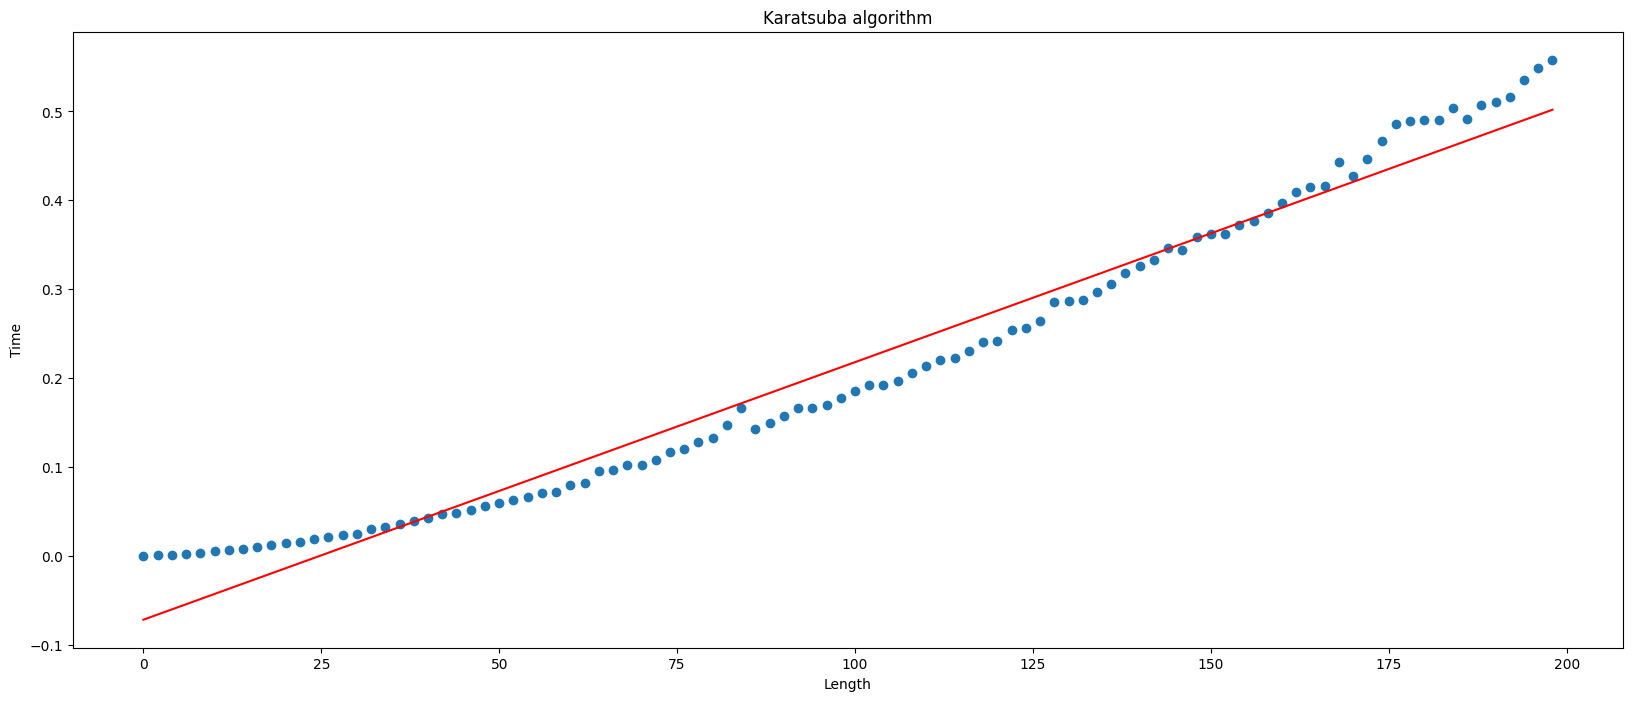

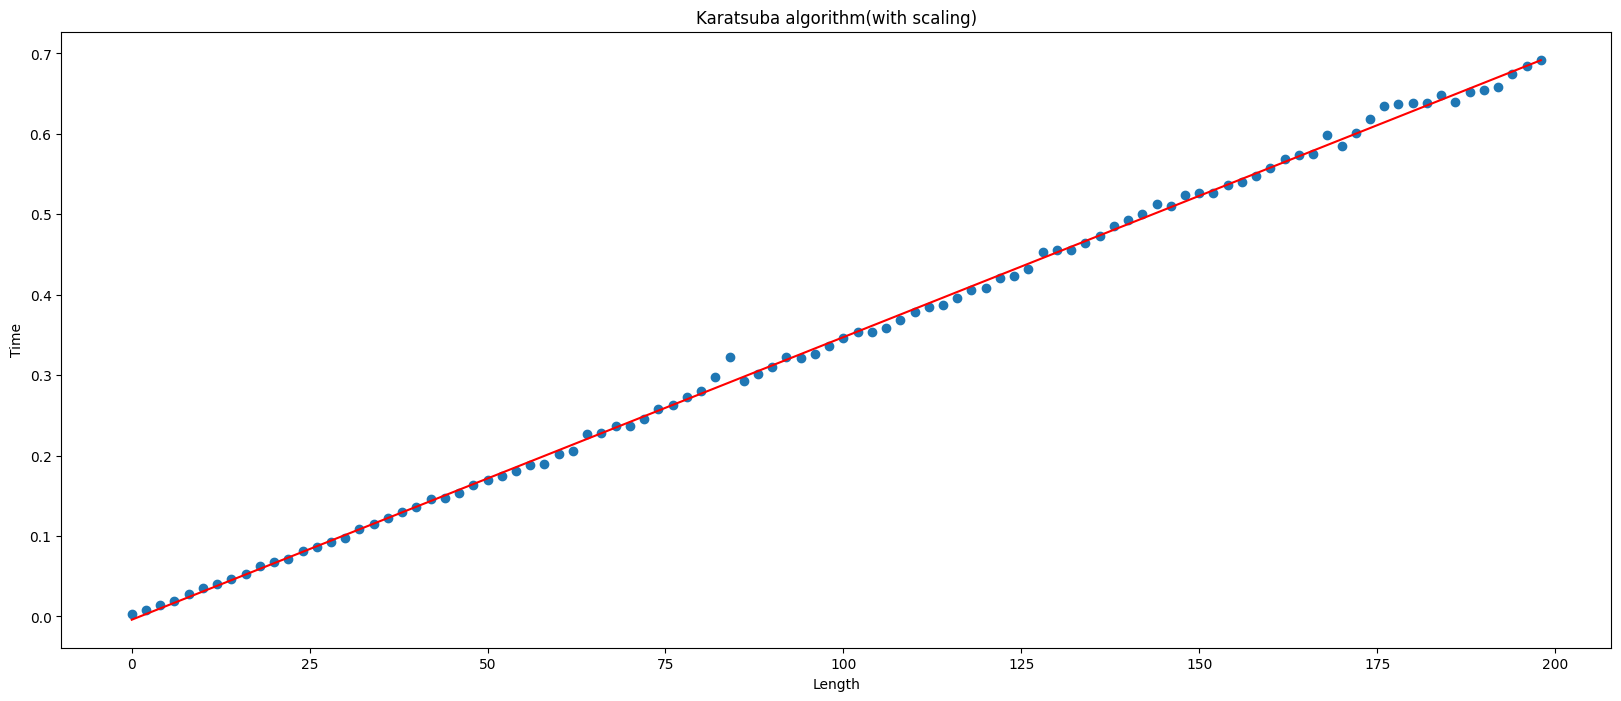

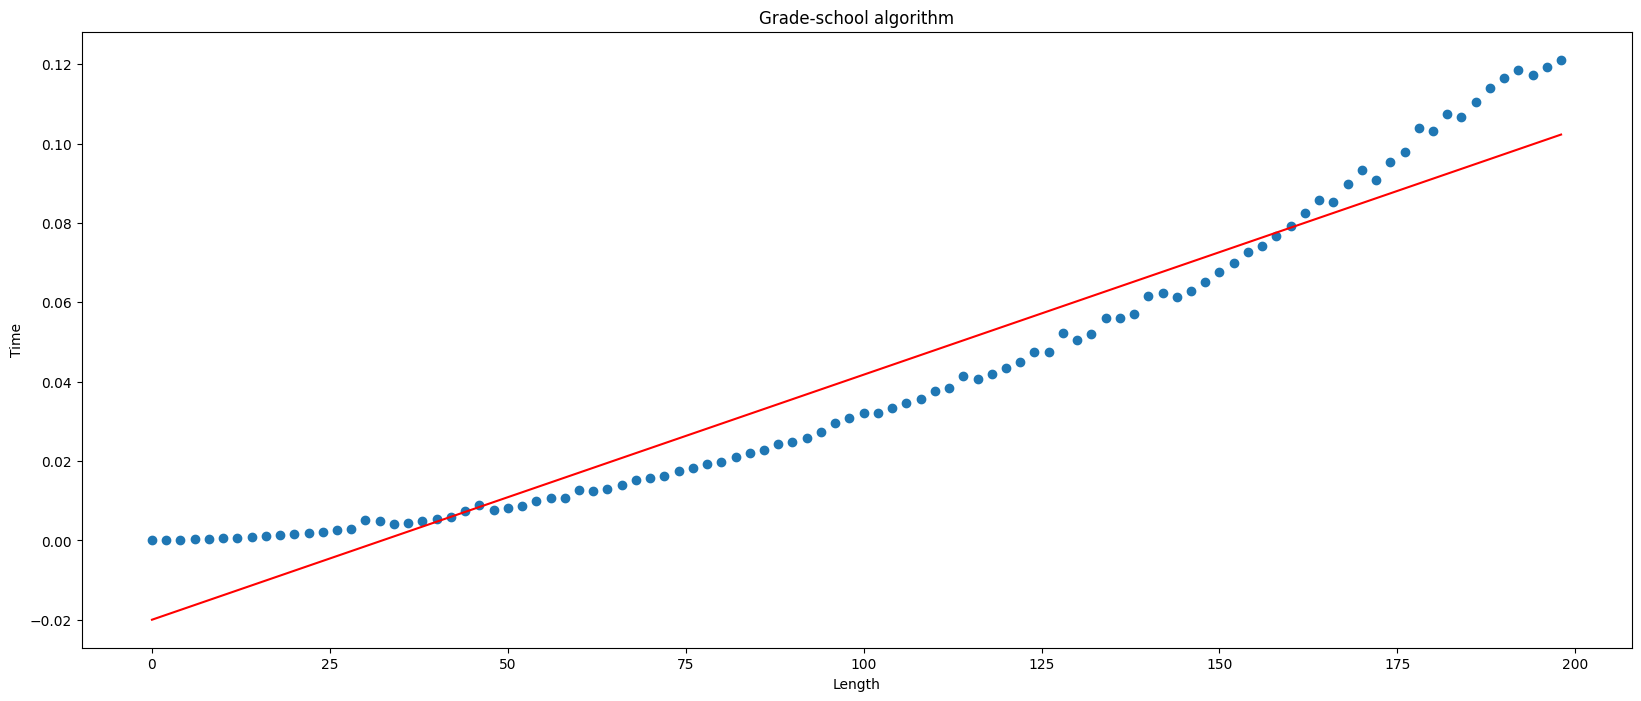

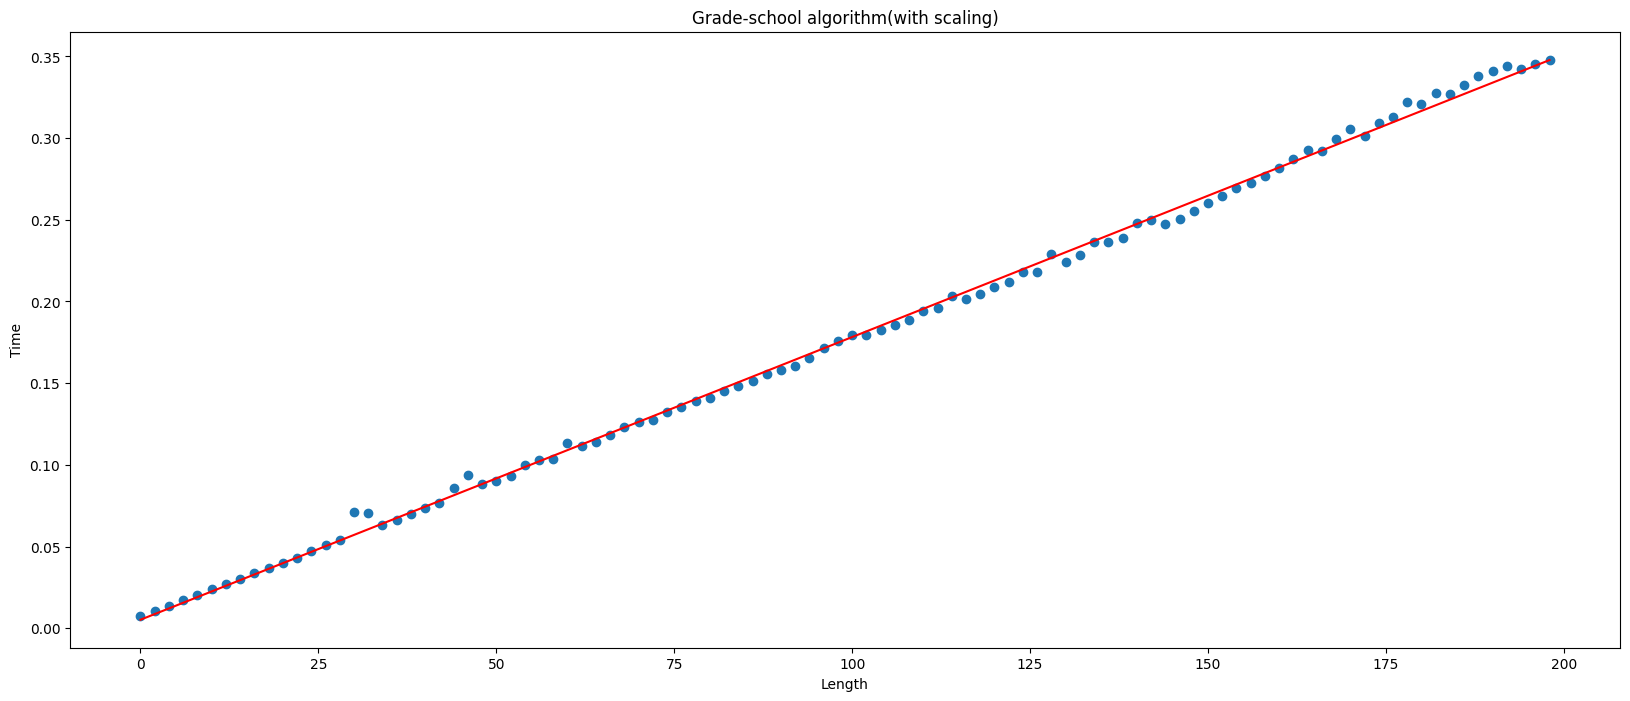

In [5]:
scale1 = lambda x: x**0.5
scale2 = lambda x: x**(1/math.log2(3))
visualisation_prod(karatsuba, scale2, "Karatsuba algorithm")
visualisation_prod(school_product, scale1, "Grade-school algorithm")

a) Explain why is it 𝑂(𝑛2) for grade-school algorithm

Кожен біт першого числа ми множимо на кожен біт другого числа. Після сумуємо всі добутки. Оскільки довжина кожного числа n, то загальна складність складає O(n^2).

b) Explain why is it $O(n^{\ln3})$ for Karatsuba algorithm

In [6]:
def change_value(func, name):
    power = random.randint(5, 10)
    length = range(2**power, 2**(power+1))
    times = []
    for n in length:
        bin_n =  list(map(lambda x: int(x), list(bin(n))[2:]))
        time = %timeit -o -r 10 -n 10 func(bin_n, bin_n)
        runs = np.array(time.all_runs)
        times.append(np.quantile(runs, 0.1))

    plt.figure(figsize=(20, 8))
    plt.scatter(length, times)
    plt.title(name)
    plt.xlabel('Value of num')
    plt.ylabel('Time')
    plt.show()

62.7 µs ± 5.17 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
66.4 µs ± 8.39 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
101 µs ± 6.44 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
97.7 µs ± 3.54 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
96 µs ± 2.79 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
99.1 µs ± 3.22 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
77.4 µs ± 17.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
88.7 µs ± 16.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
103 µs ± 11 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
74.7 µs ± 13.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
67.3 µs ± 6.46 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
66.7 µs ± 4.16 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
87.8 µs ± 11.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
86.9 µs ± 10.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each

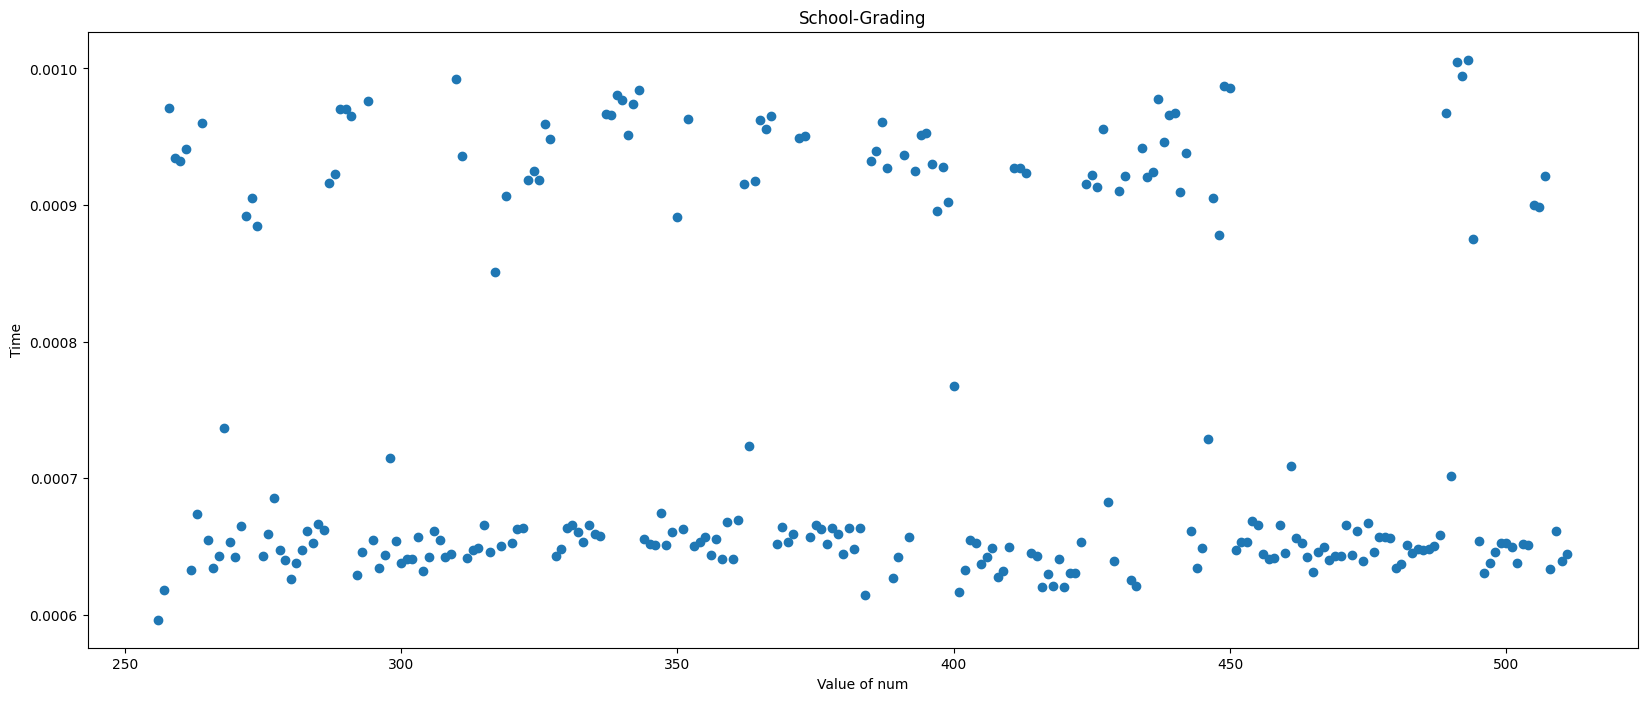

281 µs ± 41.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
362 µs ± 71.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
299 µs ± 46.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
379 µs ± 19 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
308 µs ± 7.43 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
396 µs ± 18.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
360 µs ± 8.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
501 µs ± 44.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
267 µs ± 35.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
334 µs ± 15.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
281 µs ± 4.55 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
476 µs ± 61.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
418 µs ± 67.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
616 µs ± 61.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
499 µs ± 

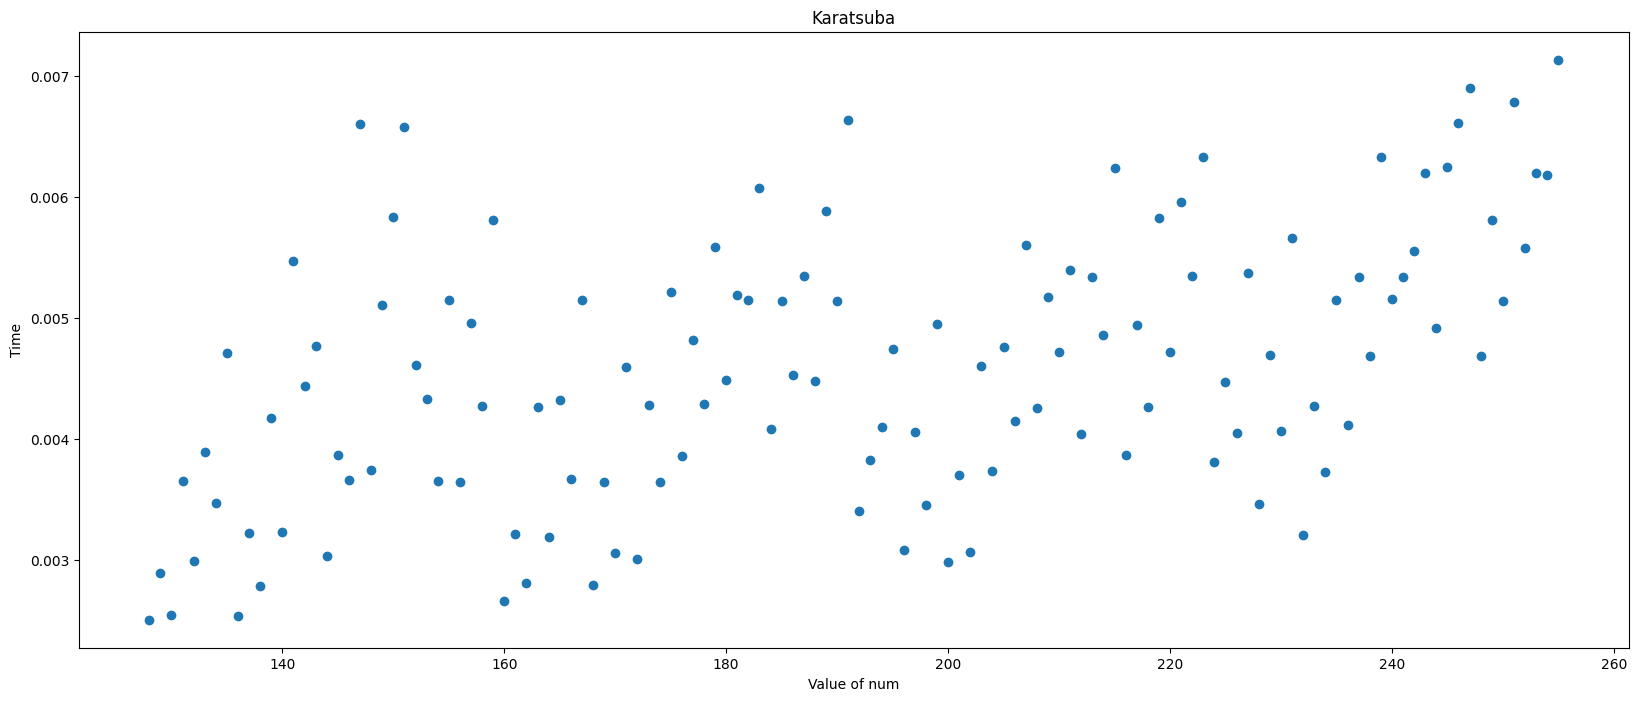

In [7]:
change_value(school_product, "School-Grading")
change_value(karatsuba, "Karatsuba")

З графіка видно, що значення не впливає на час виконання.

In [8]:
def multiply_matrix(A, B):
    return [[sum(a*b for a, b in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]

In [9]:
def strassen(A: np.matrix, B: np.matrix) -> ndarray:
    if len(A) == 1:
        return A*B

    row, col = A.shape
    m_row, m_col = row//2, col//2
    a, b, c, d = A[:m_row, :m_col], A[:m_row, m_col:], A[m_row:, :m_col], A[m_row:, m_col:]
    e, f, g, h = B[:m_row, :m_col], B[:m_row, m_col:], B[m_row:, :m_col], B[m_row:, m_col:]

    p1 = strassen(a, f - h)
    p2 = strassen(a + b, h)
    p3 = strassen(c + d, e)
    p4 = strassen(d, g - e)
    p5 = strassen(a + d, e + h)
    p6 = strassen(b - d, g + h)
    p7 = strassen(a - c, e + f)

    res00 = p5 + p4 - p2 + p6
    res01 = p1 + p2
    res10 = p3 + p4
    res11 = p1 + p5 - p3 - p7

    return np.vstack((np.hstack((res00, res01)), np.hstack((res10, res11))))

In [10]:
def visualisation_matrix(func, scale, name):
    if name == "Strassen matrix multiplication":
        size = list(map(lambda x: 2**x, range(0, 7, 1)))
    else:
        size = range(0, 80, 2)
    times = []
    for n in size:
        time = %timeit -o -r 10 -n 5 func(np.random.random((n, n)), np.random.random((n, n)))
        runs = np.array(time.all_runs)
        times.append(np.quantile(runs, 0.2))

    plt.figure(figsize=(20, 8))
    plt.scatter(size, times)
    plt.title(name)
    plt.xlabel('Size')
    plt.ylabel('Time')
    model = LinearRegression()
    model.fit(np.array(size).reshape(-1, 1), times)
    line = model.predict(np.array(size).reshape(-1, 1))
    plt.plot(size, line, color="red")

    plt.figure(figsize=(20, 8))
    plt.scatter(size, list(map(scale, times)))
    plt.title(name+"(with scaling)")
    plt.xlabel('Size')
    plt.ylabel('Time')
    model = LinearRegression()
    model.fit(np.array(size).reshape(-1, 1), list(map(scale, times)))
    line = model.predict(np.array(size).reshape(-1, 1))
    plt.plot(size, line, color="red")

The slowest run took 22.91 times longer than the fastest. This could mean that an intermediate result is being cached.
38.1 µs ± 50.4 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
34.9 µs ± 7.64 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
98.2 µs ± 3.05 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
233 µs ± 8.58 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
606 µs ± 86.2 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.18 ms ± 8.82 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.39 ms ± 204 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.99 ms ± 62.9 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.87 ms ± 130 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
3.94 ms ± 85.1 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
6.17 ms ± 716 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
The slowest run took 4.10 times longer than the fastest. This could mean that an intermediate result is b

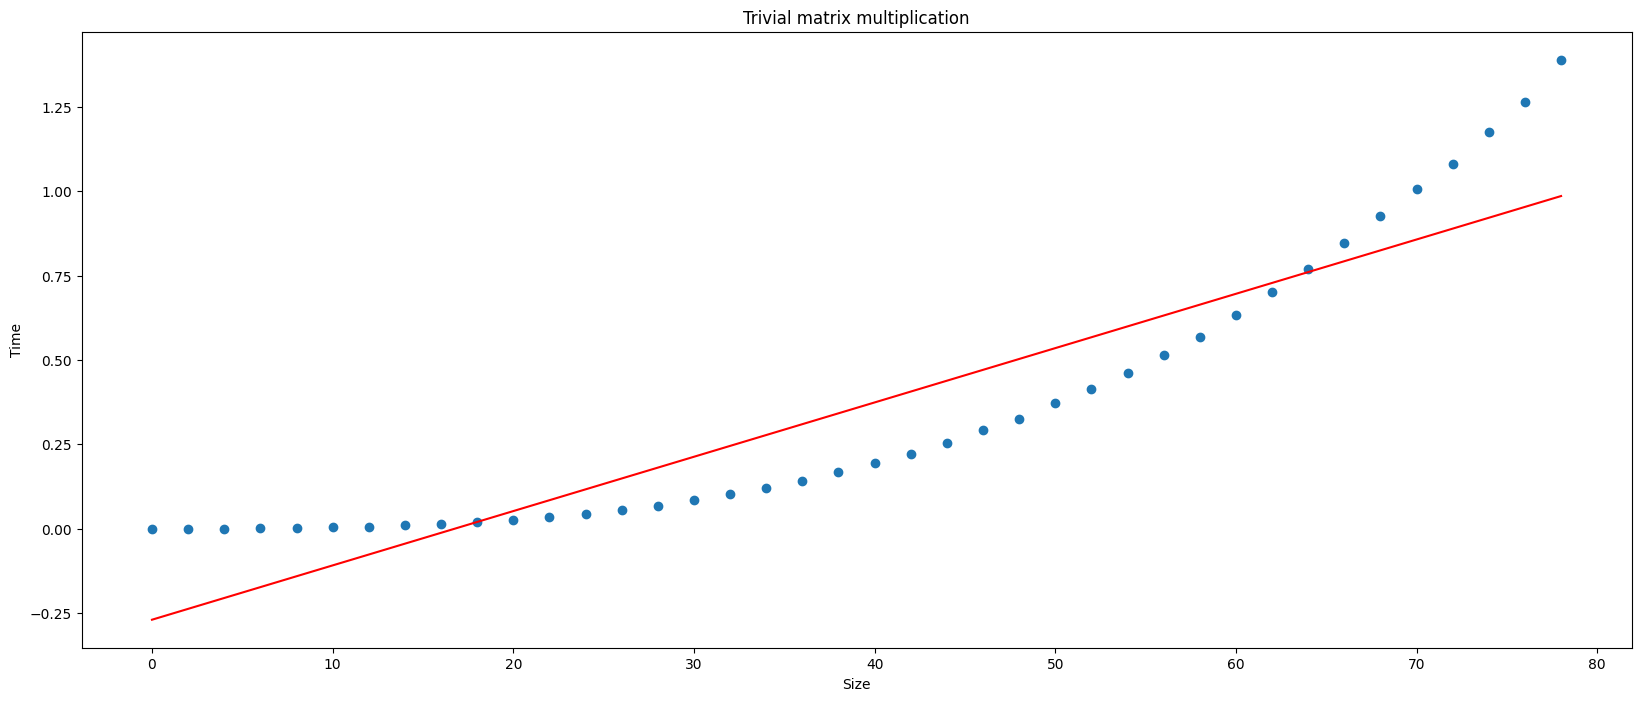

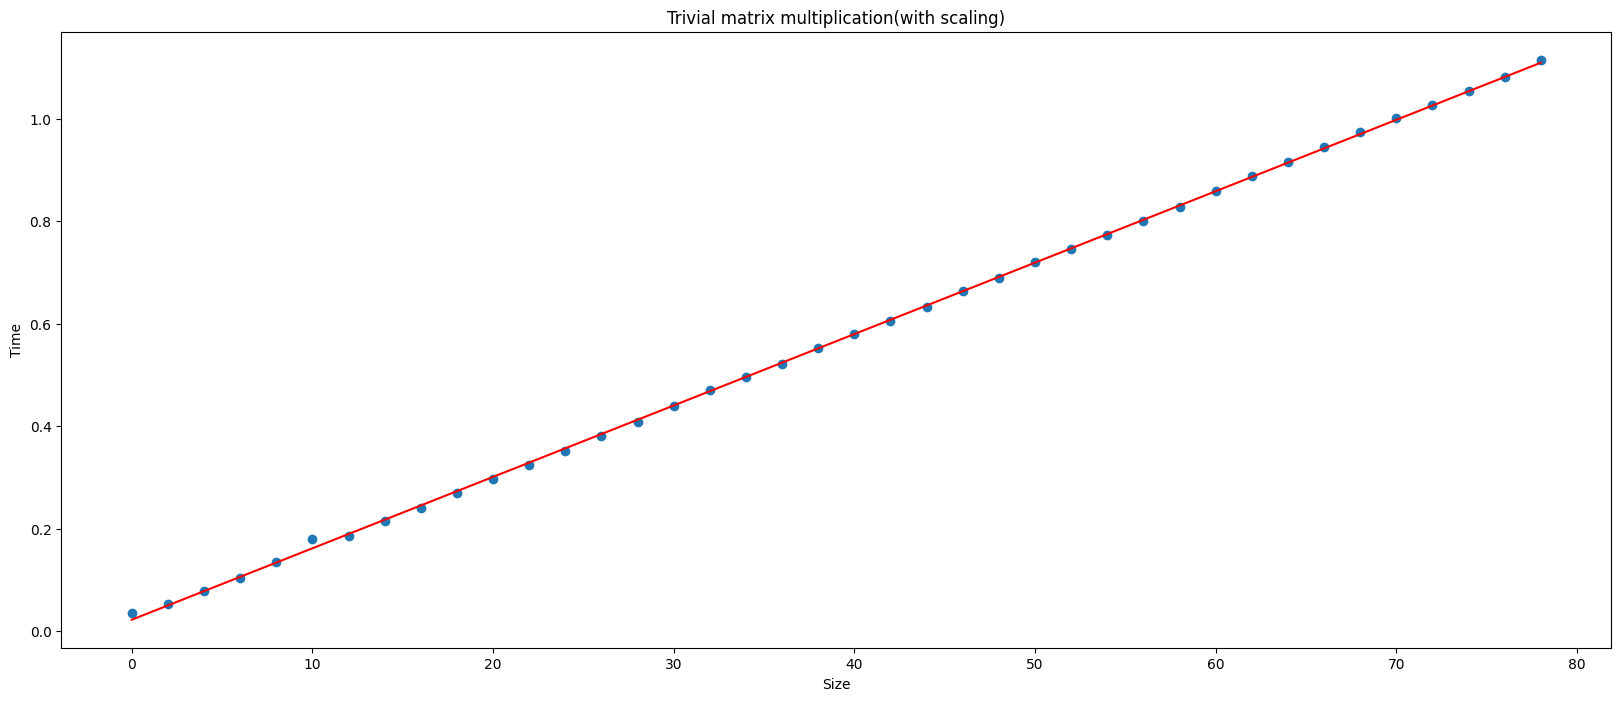

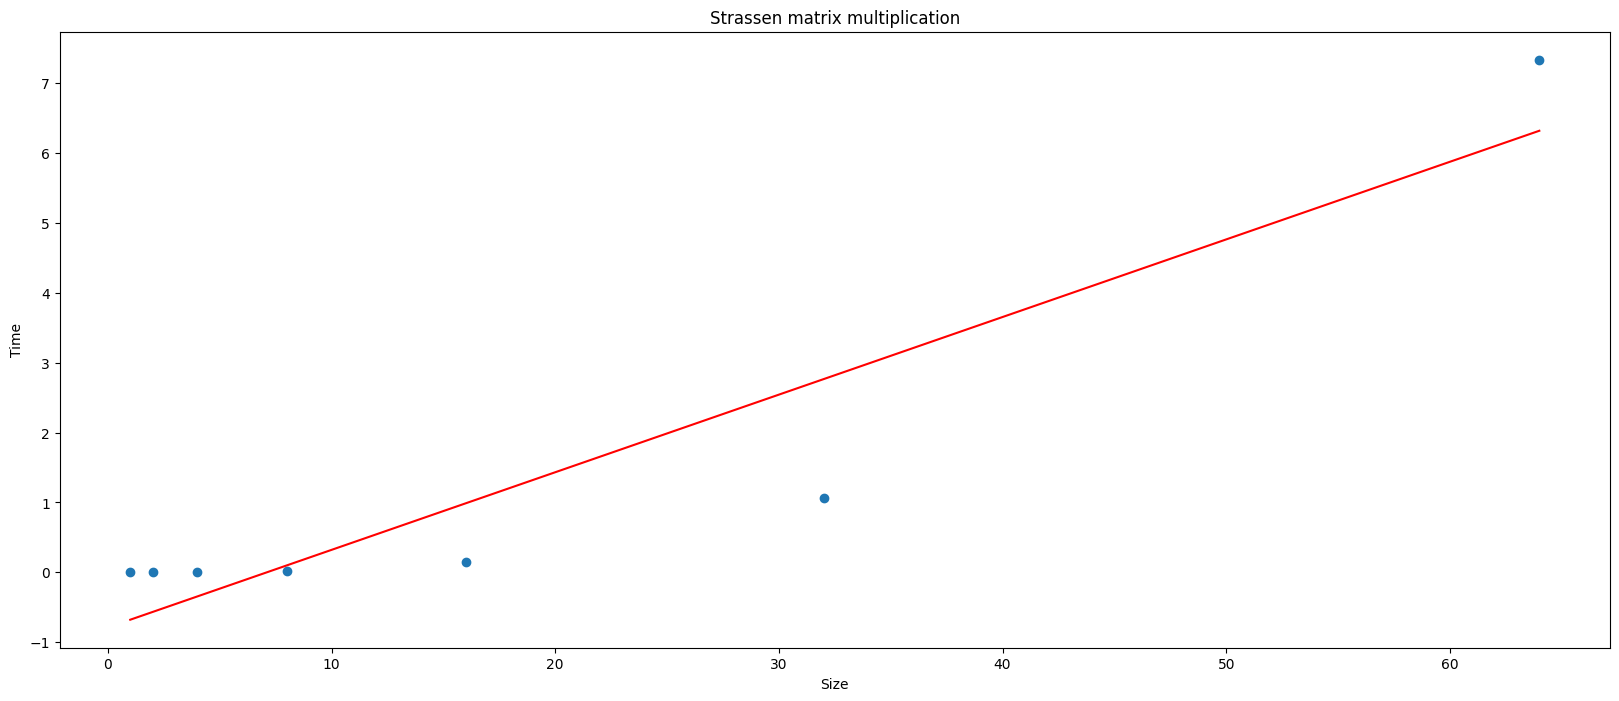

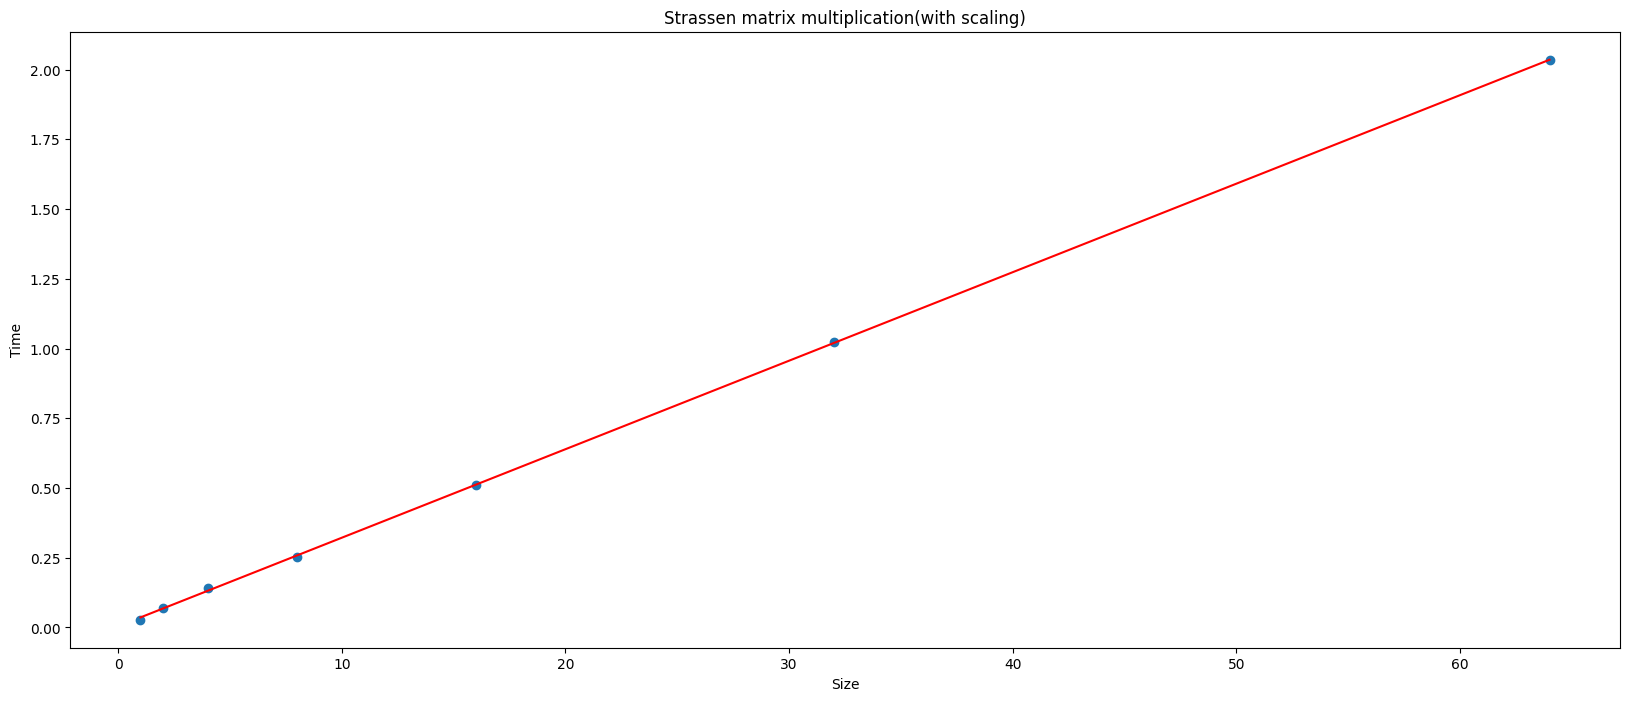

In [11]:
scale1 = lambda x: x**(1/3)
scale2 = lambda x: x**(1/math.log2(7))
visualisation_matrix(multiply_matrix, scale1, "Trivial matrix multiplication")
visualisation_matrix(strassen, scale2, "Strassen matrix multiplication")

In [12]:
def change_value_in_matrix(func, name):
    if name == "Strassen matrix multiplication":
        size = 2**random.randint(0, 5)
    else:
        size = random.randint(10, 20)
    times = []
    for n in range(40):
        mat = np.random.random((size, size))
        mat.fill(n)
        time = %timeit -o -r 10 -n 5 func(mat, mat)
        runs = np.array(time.all_runs)
        p95 = np.quantile(runs, 0.95)
        runs = runs[runs < p95]
        times.append(max(runs))

    plt.figure(figsize=(20, 8))
    plt.scatter(range(40), times)
    plt.title(name)
    plt.xlabel('Value of num')
    plt.ylabel('Time')
    plt.show()

5.31 ms ± 507 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.9 ms ± 610 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.19 ms ± 701 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.61 ms ± 424 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.76 ms ± 428 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.99 ms ± 417 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.04 ms ± 508 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.56 ms ± 417 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.23 ms ± 774 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.98 ms ± 611 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.97 ms ± 446 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.07 ms ± 728 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.75 ms ± 361 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
4.51 ms ± 173 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
5.27 ms ± 286 µs per 

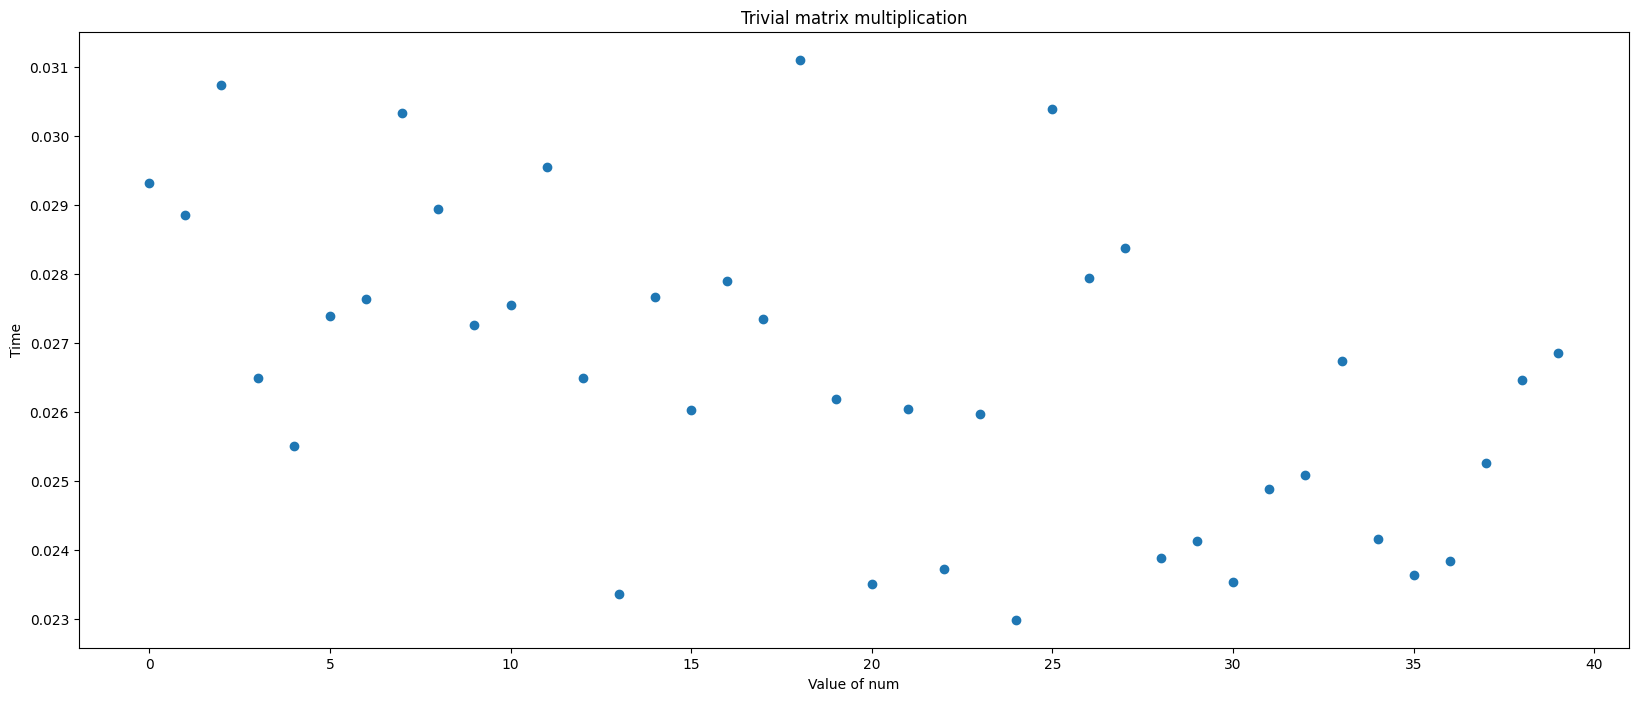

1.96 µs ± 915 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.86 µs ± 486 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.85 µs ± 472 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.85 µs ± 456 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.93 µs ± 645 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.84 µs ± 480 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.85 µs ± 452 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.82 µs ± 420 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.04 µs ± 1.01 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.91 µs ± 505 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.91 µs ± 472 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.86 µs ± 467 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
1.88 µs ± 466 ns per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.81 µs ± 1.32 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
2.05 µs ± 1.14 µs 

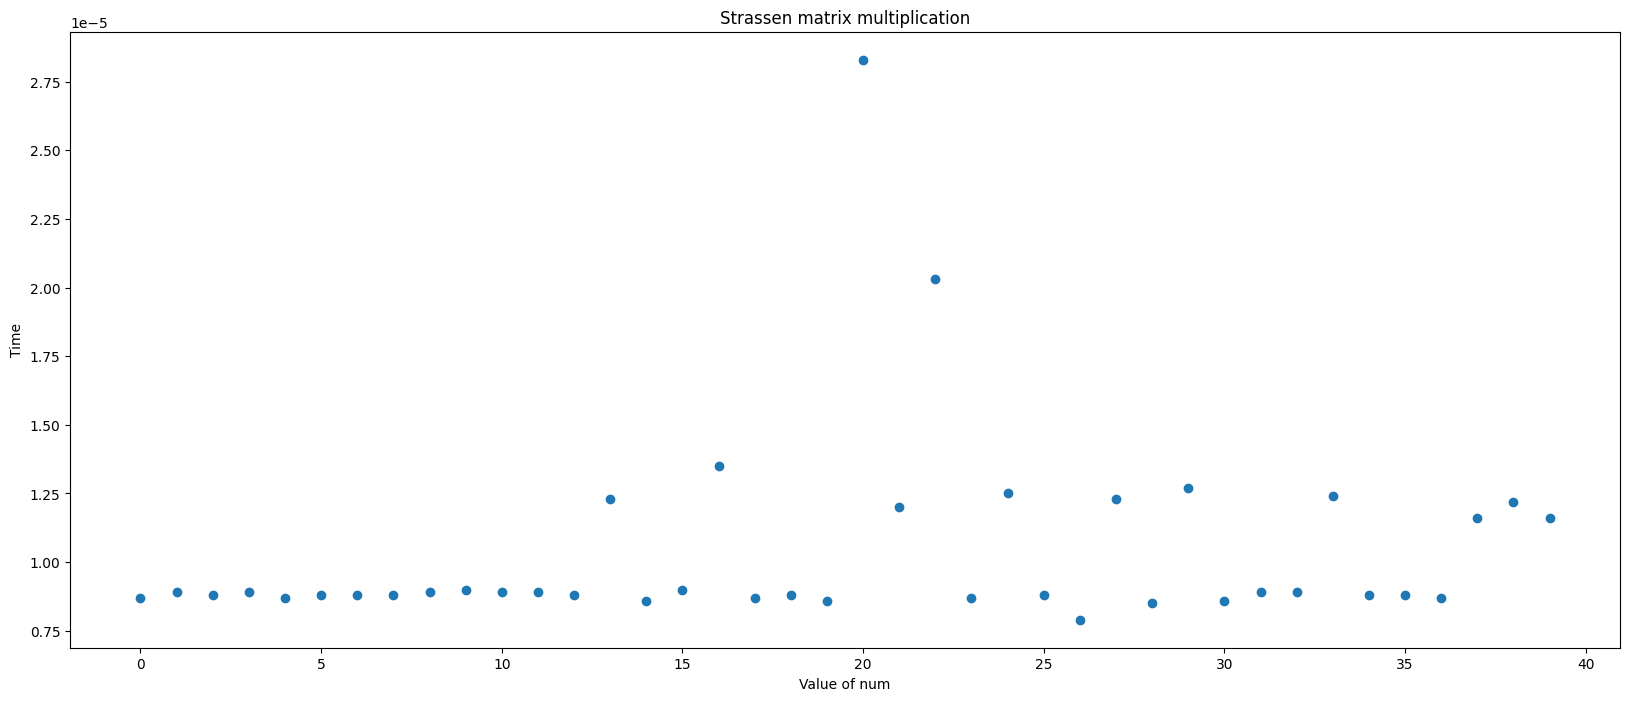

In [13]:
change_value_in_matrix(multiply_matrix, "Trivial matrix multiplication")
change_value_in_matrix(strassen, "Strassen matrix multiplication")

Randomized algorithms

Maximum and minimum element of the array

In [14]:
def find_max_el(arr: list):
    max_el = arr[0]
    for el in arr:
        if el > max_el:
            max_el = el
    return max_el

In [15]:
def find_min_el(arr: list):
    min_el = arr[0]
    for el in arr:
        if el < min_el:
            min_el = el
    return min_el

In [16]:
lst = [3, 8, 4, 6]
print(find_max_el(lst), find_min_el(lst))

8 3


Median of the array (via quicksort paradigm)

In [17]:
def partition(arr, l, r):
    pivot = arr[r]
    i = l
    for j in range(l, r):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[r] = arr[r], arr[i]
    return i

In [18]:
def find_median(arr, left, right, mid, found=False):
    if left<=mid<=right:
        partition_index = partition(arr, left, right)

        if partition_index == mid:
            if found:
                return arr[partition_index]
            else:
                return arr[partition_index], find_median(arr, mid+1, right, mid+1, True)
        elif partition_index > mid:
            return find_median(arr, left, partition_index - 1, mid, found)
        else:
            return find_median(arr, partition_index + 1, right, mid, found)
    return 0

def main_median(arr):
    length = len(arr)
    if length % 2 == 1:
        return find_median(arr, 0, length - 1, length // 2)[0]
    else:
        return sum(find_median(arr, 0, length - 1, length // 2))/2

In [19]:
arr = [12, 3, 5, 7, 4, 19, 26]
print(main_median(arr))

7


The k-smallest element of the array

In [20]:
def find_k_smallest(arr, left, right, idx):
    if left <= idx <= right:
        partition_index = partition(arr, left, right)

        if partition_index == idx:
            return arr[partition_index]
        elif partition_index > idx:
            return find_k_smallest(arr, left, partition_index - 1, idx)
        else:
            return find_k_smallest(arr, partition_index + 1, right, idx)
    return IndexError

def main_find_k_smallest(arr, k):
    return find_k_smallest(arr, 0, len(arr)-1, k)

In [21]:
arr = [12, 3, 5, 7, 4, 19, 26]
k = 1
print(main_find_k_smallest(arr, k))

4


The median and k-smallest element of the array with random pivot

In [22]:
def random_partition(arr, l, r):
    new_pivot = random.randint(l, r)
    arr[new_pivot], arr[r] = arr[r], arr[new_pivot]
    return partition(arr, l, r)

In [23]:
def find_median_random(arr, left, right, mid, found=False):
    if left<=mid<=right:
        partition_index = random_partition(arr, left, right)

        if partition_index == mid:
            if found:
                return arr[partition_index]
            else:
                return arr[partition_index], find_median(arr, mid+1, right, mid+1, True)
        elif partition_index > mid:
            return find_median_random(arr, left, partition_index - 1, mid, found)
        else:
            return find_median_random(arr, partition_index + 1, right, mid, found)
    else:
        return 0

def main_random_median(arr):
    length = len(arr)
    if length % 2 == 1:
        return find_median_random(arr, 0, length - 1, length // 2)[0]
    else:
        return sum(find_median_random(arr, 0, length - 1, length // 2))/2

In [24]:
def find_k_smallest_random(arr, left, right, idx):
    if left <= idx <= right:
        partition_index = random_partition(arr, left, right)

        if partition_index == idx:
            return arr[partition_index]
        elif partition_index > idx:
            return find_k_smallest_random(arr, left, partition_index - 1, idx)
        else:
            return find_k_smallest_random(arr, partition_index + 1, right, idx)
    return IndexError

def main_random_find_k_smallest(arr, k):
    return find_k_smallest_random(arr, 0, len(arr)-1, k)

In [25]:
arr = [12, 3, 5, 7, 4, 19, 26]
k = 1
print(main_random_median(arr))
print(main_random_find_k_smallest(arr, k))

7
4


Time complexity!!!!!!!!!

In [26]:
def visualisation_median():
    lengths = range(1, 200)
    times_r = []
    times_random_r = []
    times_s = []
    times_random_s = []
    times_rev = []
    times_random_rev = []
    for length in lengths:
        time = %timeit -o -r 15 -n 7 main_median(random.sample(range(-200, 200), length))
        runs = np.array(time.all_runs)
        times_r.append(np.quantile(runs, 0.1))

        time_r = %timeit -o -r 15 -n 7 main_random_median(random.sample(range(-200, 200), length))
        runs_r = np.array(time_r.all_runs)
        times_random_r.append(np.quantile(runs_r, 0.1))

        rnd_lst = random.sample(range(-200, 200), length)
        rnd_lst.sort()

        time = %timeit -o -r 15 -n 7 main_median(rnd_lst)
        runs = np.array(time.all_runs)
        times_s.append(np.quantile(runs, 0.1))

        rnd_lst.sort()
        time_r = %timeit -o -r 15 -n 7 main_random_median(rnd_lst)
        runs_r = np.array(time_r.all_runs)
        times_random_s.append(np.quantile(runs_r, 0.1))

        rnd_lst.sort()
        rnd_lst.reverse()
        time = %timeit -o -r 15 -n 7 main_median(rnd_lst)
        runs = np.array(time.all_runs)
        times_rev.append(np.quantile(runs, 0.1))

        rnd_lst.sort()
        rnd_lst.reverse()
        time_r = %timeit -o -r 15 -n 7 main_random_median(rnd_lst)
        runs_r = np.array(time_r.all_runs)
        times_random_rev.append(np.quantile(runs_r, 0.1))

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_r, label = 'Median')
    ax.plot(lengths, times_random_r, label = 'Median random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Random list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_s, label = 'Median')
    ax.plot(lengths, times_random_s, label = 'Median random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Sorted list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_rev, label = 'Median')
    ax.plot(lengths, times_random_rev, label = 'Median random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Reverse sorted list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_r, label = 'Random list')
    ax.plot(lengths, times_s, label = 'Sorted list')
    ax.plot(lengths, times_rev, label = 'Reverse sorted list')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Median')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_random_r, label = 'Random list')
    ax.plot(lengths, times_random_s, label = 'Sorted list')
    ax.plot(lengths, times_random_rev, label = 'Reverse sorted list')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Median with random pivot')
    ax.legend()
    plt.show()

The slowest run took 8.77 times longer than the fastest. This could mean that an intermediate result is being cached.
22.5 µs ± 18.7 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
14 µs ± 1.93 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
2.58 µs ± 533 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
6.45 µs ± 1.74 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
2.48 µs ± 426 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
6 µs ± 760 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
20 µs ± 8.43 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
19.8 µs ± 3.17 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
2.38 µs ± 422 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
7.83 µs ± 1.16 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
3.15 µs ± 682 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
9.52 µs ± 1.43 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
11.8 µs ± 2.69 µs per loop (mean ± std. de

<Figure size 2000x800 with 0 Axes>

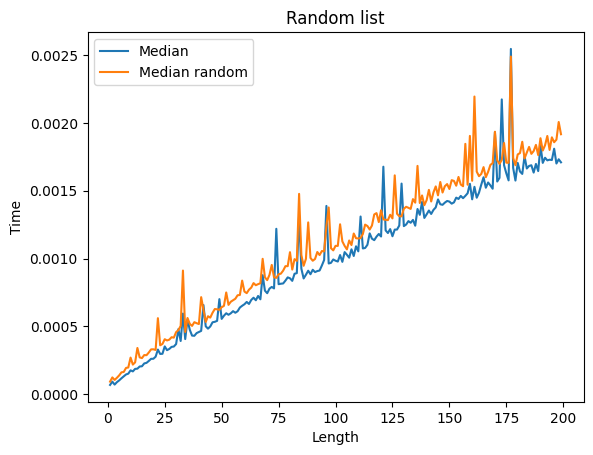

<Figure size 2000x800 with 0 Axes>

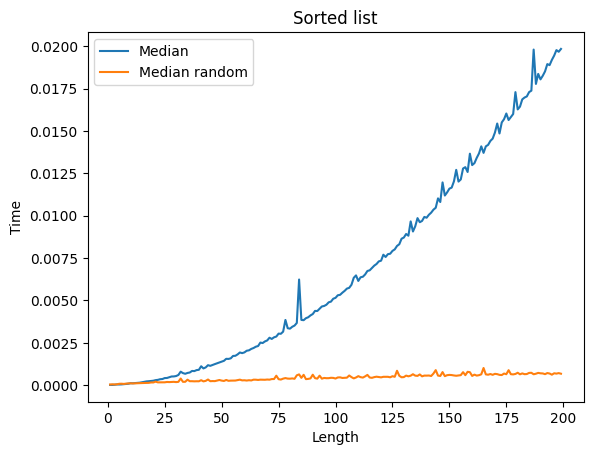

<Figure size 2000x800 with 0 Axes>

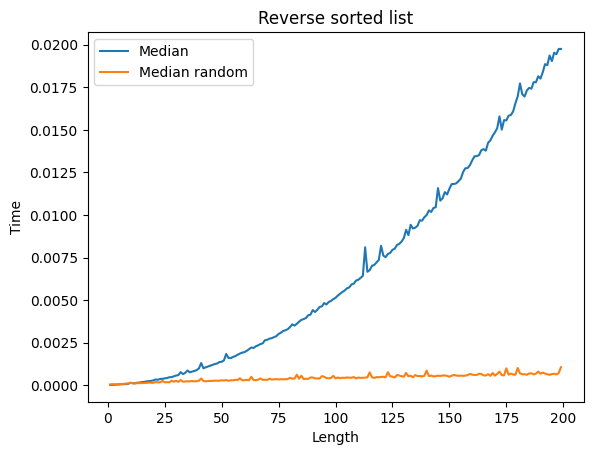

<Figure size 2000x800 with 0 Axes>

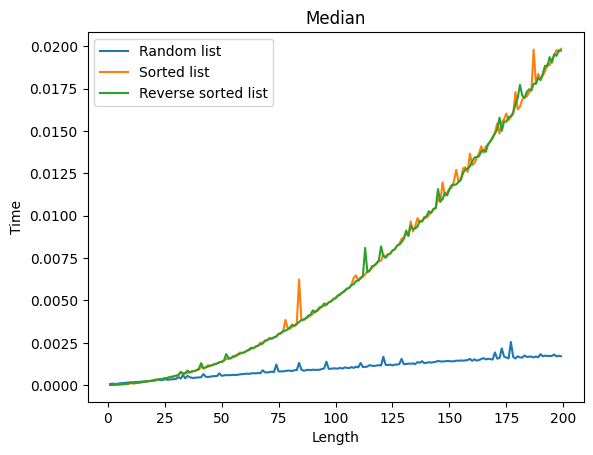

<Figure size 2000x800 with 0 Axes>

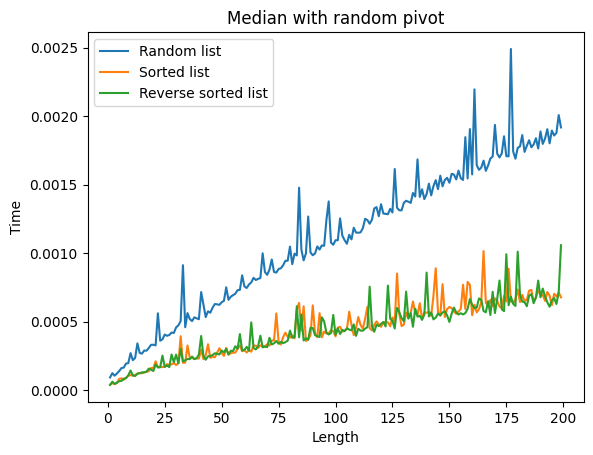

In [27]:
visualisation_median()

In [28]:
def visualisation_smallest():
    lengths = range(1, 200)
    times_r = []
    times_random_r = []
    times_s = []
    times_random_s = []
    times_rev = []
    times_random_rev = []
    for length in lengths:
        time = %timeit -o -r 15 -n 7 main_find_k_smallest(random.sample(range(-200, 200), length), random.randint(0, length))
        runs = np.array(time.all_runs)
        times_r.append(np.quantile(runs, 0.1))

        time_r = %timeit -o -r 15 -n 7 main_random_find_k_smallest(random.sample(range(-200, 200), length), random.randint(0, length))
        runs_r = np.array(time_r.all_runs)
        times_random_r.append(np.quantile(runs_r, 0.1))

        rnd_lst = random.sample(range(-200, 200), length)
        rnd_lst.sort()

        time = %timeit -o -r 15 -n 7 main_find_k_smallest(rnd_lst, random.randint(0, length))
        runs = np.array(time.all_runs)
        times_s.append(np.quantile(runs, 0.1))

        rnd_lst.sort()
        time_r = %timeit -o -r 15 -n 7 main_random_find_k_smallest(rnd_lst, random.randint(0, length))
        runs_r = np.array(time_r.all_runs)
        times_random_s.append(np.quantile(runs_r, 0.1))

        rnd_lst.sort()
        rnd_lst.reverse()
        time = %timeit -o -r 15 -n 7 main_find_k_smallest(rnd_lst, random.randint(0, length))
        runs = np.array(time.all_runs)
        times_rev.append(np.quantile(runs, 0.1))

        rnd_lst.sort()
        rnd_lst.reverse()
        time_r = %timeit -o -r 15 -n 7 main_random_find_k_smallest(rnd_lst, random.randint(0, length))
        runs_r = np.array(time_r.all_runs)
        times_random_rev.append(np.quantile(runs_r, 0.1))

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_r, label = 'K-smallest')
    ax.plot(lengths, times_random_r, label = 'K-smallest with random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Random list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_s, label = 'K-smallest')
    ax.plot(lengths, times_random_s, label = 'K-smallest with random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Sorted list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_rev, label = 'K-smallest')
    ax.plot(lengths, times_random_rev, label = 'K-smallest with random')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('Reverse sorted list')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_r, label = 'Random list')
    ax.plot(lengths, times_s, label = 'Sorted list')
    ax.plot(lengths, times_rev, label = 'Reverse sorted list')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('K-smallest')
    ax.legend()
    plt.show()

    plt.figure(figsize=(20, 8))
    fig, ax = plt.subplots()
    ax.plot(lengths, times_random_r, label = 'Random list')
    ax.plot(lengths, times_random_s, label = 'Sorted list')
    ax.plot(lengths, times_random_rev, label = 'Reverse sorted list')
    plt.xlabel('Length')
    plt.ylabel('Time')
    plt.title('K-smallest with random pivot')
    ax.legend()
    plt.show()

In [29]:
visualisation_smallest()

7.7 µs ± 1.4 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
8.51 µs ± 1.67 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
3.82 µs ± 642 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
3.45 µs ± 773 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
2.44 µs ± 523 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
3.57 µs ± 716 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
9.25 µs ± 1.32 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
11.7 µs ± 1.71 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
3.18 µs ± 766 ns per loop (mean ± std. dev. of 15 runs, 7 loops each)
4.67 µs ± 1.08 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
4.87 µs ± 1.32 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
5.91 µs ± 1.55 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
20.5 µs ± 9.72 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
13.8 µs ± 1.21 µs per loop (mean ± std. dev. of 15 runs, 7 loops each)
4.55 µs ± 1.0

KeyboardInterrupt: 

Quicksort

In [ ]:
def quicksort(arr, left, right):
    if left<right:
        pivot = arr[right]
        i = left
        for j in range(left, right):
            if arr[j] < pivot:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1
        arr[i], arr[right] = arr[right], arr[i]
        quicksort(arr, left, i-1)
        quicksort(arr, i+1, right)

def main_quicksort(arr):
    quicksort(arr, 0, len(arr)-1)

In [ ]:
arr = [12, 3, 5, 7, 4, 19, 26]
arr1 = [0, 0]
main_quicksort(arr1)
print(arr1)

Quicksort with deterministic median as pivot

In [ ]:
def partition_for_sort(arr, l, r):
    pivot = arr[r][1]
    i = l
    for j in range(l, r):
        if arr[j][1] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[r] = arr[r], arr[i]
    return i

def find_median_for_sort(arr, left, right, mid):
    if left <= mid <= right:
        partition_index = partition_for_sort(arr, left, right)

        if partition_index == mid:
            return arr[partition_index]
        elif partition_index > mid:
            return find_median_for_sort(arr, left, partition_index - 1, mid)
        else:
            return find_median_for_sort(arr, partition_index + 1, right, mid)

def quicksort_median_pivot(arr, left, right):
    if left<right:
        if right-left == 1:
            pivot = arr[right]
        else:
            new_arr = []
            for inf in enumerate(arr):
                new_arr.append(inf)
            pivot_idx, pivot = find_median_for_sort(new_arr, left, right, (right-left)//2)
            arr[pivot_idx], arr[right] = arr[right], arr[pivot_idx]
        i = left
        for j in range(left, right):
            if arr[j] < pivot:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1
        arr[i], arr[right] = arr[right], arr[i]
        quicksort_median_pivot(arr, left, i-1)
        quicksort_median_pivot(arr, i+1, right)

def main_quicksort_with_median(arr):
    quicksort_median_pivot(arr, 0, len(arr)-1)

In [ ]:
arr0 = [12, 3, 5, 7, 4, 19, 26]
arr1 = [0, -9, -1, -1, 90]
main_quicksort_with_median(arr1)
print(arr1)

Quicksort with randomized median as pivot

In [ ]:
def random_partition_for_sort(arr, l, r):
    new_pivot = random.randint(l, r)
    arr[new_pivot], arr[r] = arr[r], arr[new_pivot]
    return partition_for_sort(arr, l, r)

def find_median_for_sort_rand(arr, left, right, mid):
    if left <= mid <= right:
        partition_index = random_partition_for_sort(arr, left, right)

        if partition_index == mid:
            return arr[partition_index]
        elif partition_index > mid:
            return find_median(arr, left, partition_index - 1, mid)
        else:
            return find_median(arr, partition_index + 1, right, mid)

def quicksort_random_median_pivot_for_sort(arr, left, right):
    if left<right:
        new_arr = []
        for inf in enumerate(arr):
            new_arr.append(inf)
        pivot_idx, pivot = find_median_for_sort(new_arr, left, right, right-left//2)
        arr[pivot_idx], arr[right] = arr[right], arr[pivot_idx]
        i = left
        for j in range(left, right):
            if arr[j] < pivot:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1
        arr[i], arr[right] = arr[right], arr[i]
        quicksort(arr, left, i-1)
        quicksort(arr, i+1, right)

In [ ]:
arr0 = [12, 3, 5, 7, 4, 19, 26]
arr1 = [0, 0, -1, -1, 0]
main_quicksort(arr1)
print(arr1)